#TODO: Maybe try this - https://youtu.be/0VLAoVGf_74?si=zuJ8AL_wLbsbRdd5
Compare MHA, MQA, MLA (DeepSeek)

## Part 2: Apply TransformerClassifier (Encoder Only) 

In [ ]:
from common_utils import *
from transformer import TransformerClassifier
from datasets import load_dataset

In [ ]:
wassa_dataset = load_dataset("csv", data_files="./dataset/text_emotion.csv")
wassa_dataset = wassa_dataset.rename_column('content', 'text')
wassa_dataset_dict = create_train_validation_test(wassa_dataset['train'])

embedding_matrix = np.load(EMBEDDING_PATH)

with open(WORD2IDX_PATH, "r", encoding="utf-8") as f:
    word2idx = json.load(f)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snorl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
Calculating sequence lengths: 100%|██████████| 28000/28000 [00:06<00:00, 4525.28it/s]



Train set sequence length statistics:
min_length: 1
max_length: 106
mean_length: 16.433821428571427
median_length: 15
95th_percentile: 31
99th_percentile: 36


Calculating sequence lengths: 100%|██████████| 4000/4000 [00:00<00:00, 4359.21it/s]



Validation set sequence length statistics:
min_length: 1
max_length: 91
mean_length: 16.40625
median_length: 15
95th_percentile: 31
99th_percentile: 36


Calculating sequence lengths: 100%|██████████| 8000/8000 [00:01<00:00, 4640.26it/s]



Test set sequence length statistics:
min_length: 1
max_length: 78
mean_length: 16.49775
median_length: 15
95th_percentile: 31
99th_percentile: 36


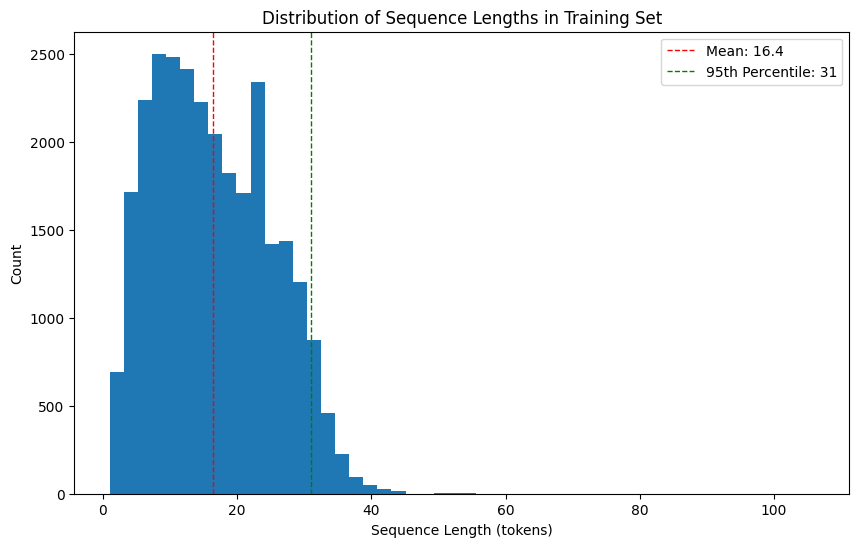

In [7]:
import nltk
import numpy as np
from tqdm import tqdm

# Make sure NLTK tokenizer is available
nltk.download('punkt')

# Calculate sequence lengths for each dataset split
def get_seq_length_stats(dataset):
    lengths = []
    for example in tqdm(dataset, desc="Calculating sequence lengths"):
        tokens = nltk.word_tokenize(example["text"])
        lengths.append(len(tokens))
    
    lengths = np.array(lengths)
    return {
        "min_length": int(np.min(lengths)),
        "max_length": int(np.max(lengths)),
        "mean_length": float(np.mean(lengths)),
        "median_length": int(np.median(lengths)),
        "95th_percentile": int(np.percentile(lengths, 95)),
        "99th_percentile": int(np.percentile(lengths, 99))
    }

# Calculate for train set
train_stats = get_seq_length_stats(wassa_dataset_dict['train'])
print("\nTrain set sequence length statistics:")
for stat, value in train_stats.items():
    print(f"{stat}: {value}")

# Optionally calculate for validation and test sets
val_stats = get_seq_length_stats(wassa_dataset_dict['validation'])
print("\nValidation set sequence length statistics:")
for stat, value in val_stats.items():
    print(f"{stat}: {value}")

test_stats = get_seq_length_stats(wassa_dataset_dict['test'])
print("\nTest set sequence length statistics:")
for stat, value in test_stats.items():
    print(f"{stat}: {value}")

# Plot histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist([len(nltk.word_tokenize(example["text"])) for example in wassa_dataset_dict['train']], bins=50)
plt.title('Distribution of Sequence Lengths in Training Set')
plt.xlabel('Sequence Length (tokens)')
plt.ylabel('Count')
plt.axvline(train_stats['mean_length'], color='r', linestyle='dashed', linewidth=1, label=f"Mean: {train_stats['mean_length']:.1f}")
plt.axvline(train_stats['95th_percentile'], color='g', linestyle='dashed', linewidth=1, label=f"95th Percentile: {train_stats['95th_percentile']}")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, 'sequence_length_histogram.png'))
plt.show()